# Riskfolio-Lib Tutorial: 
<br>__[Financionerioncios](https://financioneroncios.wordpress.com)__
<br>__[Orenji](https://www.orenj-i.net)__
<br>__[Riskfolio-Lib](https://riskfolio-lib.readthedocs.io/en/latest/)__
<br>__[Dany Cajas](https://www.linkedin.com/in/dany-cajas/)__
<a href='https://ko-fi.com/B0B833SXD' target='_blank'><img height='36' style='border:0px;height:36px;' src='https://cdn.ko-fi.com/cdn/kofi1.png?v=2' border='0' alt='Buy Me a Coffee at ko-fi.com' /></a> 

## Tutorial 23: Dollar Neutral Portfolios

## 1. Downloading the data:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import warnings

warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:.4%}'.format

# Date range
start = '2020-01-01'
end = '2023-01-01'

# # Tickers of assets
# assets = ['JCI', 'TGT', 'CMCSA', 'CPB', 'MO', 'APA', 'MMC', 'JPM',
#           'ZION', 'PSA', 'BAX', 'BMY', 'LUV', 'PCAR', 'TXT', 'TMO',
#           'DE', 'MSFT', 'HPQ', 'SEE', 'VZ', 'CNP', 'NI', 'T', 'BA']
assets = ['AAPL','PEP','JNJ','TSLA','BA']
assets.sort()

# Downloading data
data = yf.download(assets, start = start, end = end)
data = data.loc[:,('Adj Close', slice(None))]
data.columns = assets

[*********************100%***********************]  5 of 5 completed


In [2]:
# Calculating returns

Y = data[assets].pct_change().dropna()

display(Y.head())

,AAPL,BA,JNJ,PEP,TSLA
Date,,,,,
2020-01-03,-0.9722%,-0.1680%,-1.1578%,-0.1399%,2.9633%
2020-01-06,0.7968%,0.2945%,-0.1247%,0.3834%,1.9255%
2020-01-07,-0.4703%,1.0607%,0.6107%,-1.5718%,3.8801%
2020-01-08,1.6086%,-1.7523%,-0.0138%,0.5149%,4.9205%
2020-01-09,2.1241%,1.4998%,0.2966%,0.0668%,-2.1945%


## 2. Mean Risk Dollar Neutral Portfolios

To calculate dollar neutral portfolios we have to solve the following problem:

$$
\begin{aligned}
& \max_{w} & & \mu w \\
& & & \sum^{N}_{i=1} w_{i} = 0 \\
& & & \phi(w) \leq \overline{\phi} \\
& & & \sum^{N}_{i=1} \max(w_{i},0) \leq W^{L} \\
& & & \sum^{N}_{i=1} -\min(w_{i},0) \leq W^{S} \\
& & & W^{S} \leq w \leq W^{L}\\
\end{aligned}
$$

Where $\mu$ is the mean vector, $w$ are the portfolio weights, $\phi(w)$ is a convex risk function, $\overline{\phi}$ is an upper bound for the risk function, $W^{L}$ is the upper bound of positive weights and $W^{S}$ is the upper bound of negative weights.

## 3. Dollar Neutral Portfolio with a Constraint on Standard Deviation

### 3.1 Calculating Dollar Neutral Portfolio

In [15]:
import riskfolio as rp

# Building the portfolio object
port = rp.Portfolio(returns=Y)

# Calculating optimal portfolio

# Select method and estimate input parameters:

method_mu='hist' # Method to estimate expected returns based on historical data.
method_cov='hist' # Method to estimate covariance matrix based on historical data.

port.assets_stats(method_mu=method_mu, method_cov=method_cov, d=0.94)

# Market neutral constraints:

port.sht = True # Allows short positions
port.uppersht = 1 # Upper bound for sum of negative weights
port.upperlng = 1 # Upper bound for sum of positive weights
port.budget = 0 # Sum of all weights
port.upperdev = 0.20/252**0.5 # Upper bound for daily standard deviation

# Estimate optimal portfolio:

model='Classic' # Could be Classic (historical), BL (Black Litterman), FM (Factor Model)
                # or BL_FM (Black Litterman with Factor Model)
rm = 'MV' # Risk measure used, this time will be variance
obj = 'MaxRet' # For Market Neutral the objective must be
hist = True # Use historical scenarios for risk measures that depend on scenarios
rf = 0 # Risk free rate
l = 3 # Risk aversion factor, only useful when obj is 'Utility'

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

print("Sum weights : ", np.round(np.sum(w.to_numpy()),4))
display(w.T)

Sum weights :  -0.0


,AAPL,BA,JNJ,PEP,TSLA
weights,4.1686%,-19.5274%,-22.7636%,11.0028%,27.1195%


### 3.2 Plotting portfolio composition

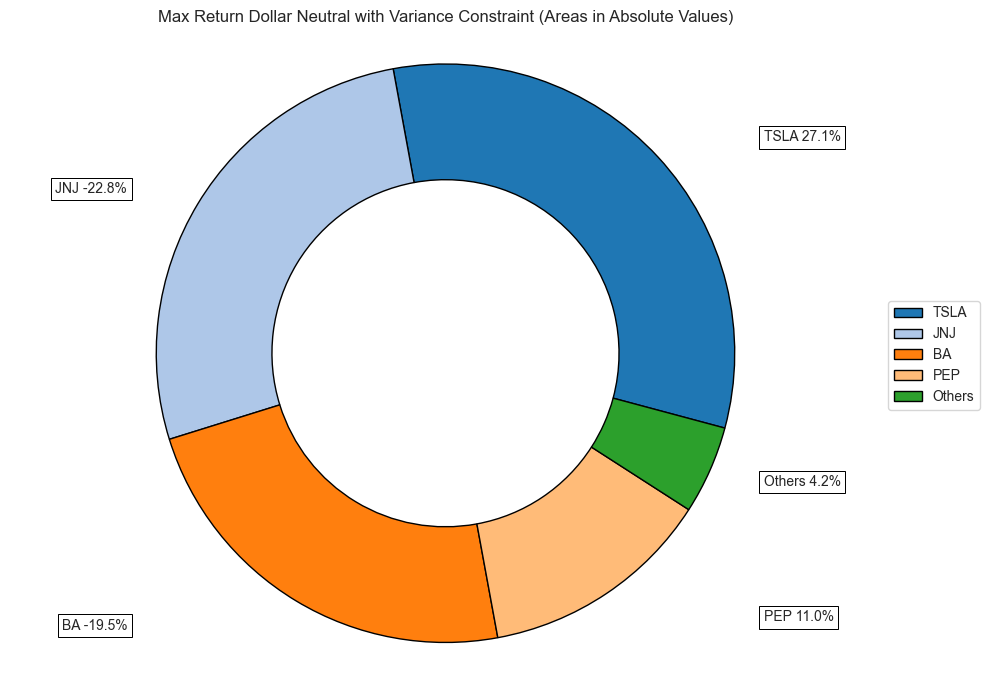

In [4]:
# Plotting the composition of the portfolio

title = "Max Return Dollar Neutral with Variance Constraint"
ax = rp.plot_pie(w=w,
                 title=title,
                 others=0.05,
                 nrow=25,
                 cmap = "tab20",
                 height=7,
                 width=10,
                 ax=None)

UnboundLocalError: local variable 'b' referenced before assignment

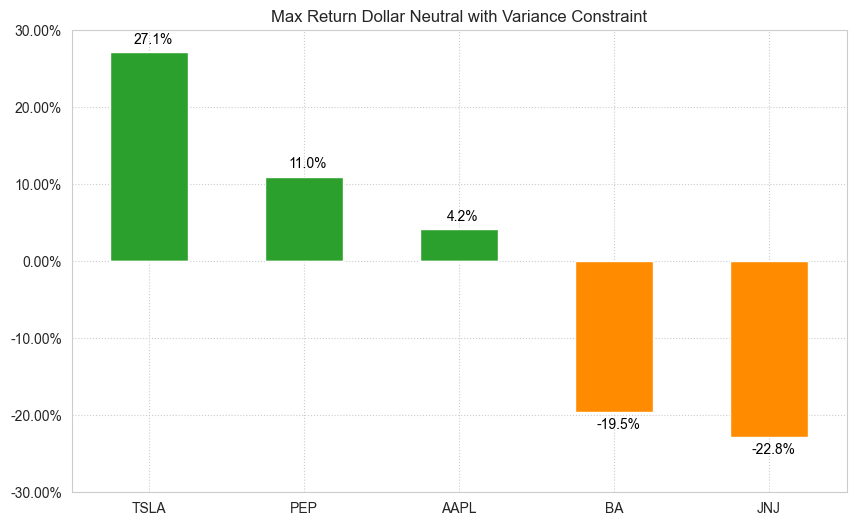

In [16]:
# Plotting the composition of the portfolio using bar chart

ax = rp.plot_bar(w,
                 title="Max Return Dollar Neutral with Variance Constraint",
                 kind="v",
                 others=0.05,
                 nrow=25,
                 height=6,
                 width=10)

### 3.3 Calculating efficient frontier

In [17]:
points = 50 # Number of points of the frontier
port.upperdev = None # Deleting the upper bound for daily standard deviation

frontier = port.efficient_frontier(model=model, rm=rm, points=points, rf=rf, hist=hist)

display(frontier)

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
AAPL,0.0000%,0.3248%,0.6496%,0.9745%,1.2993%,1.6241%,1.9490%,2.2737%,2.5986%,2.9234%,...,8.2114%,8.0427%,7.8380%,5.0037%,2.1870%,-0.0000%,-0.0000%,-0.0000%,-0.0000%,0.0000%
BA,0.0000%,-1.5215%,-3.0430%,-4.5644%,-6.0859%,-7.6074%,-9.1288%,-10.6503%,-12.1718%,-13.6932%,...,-59.3347%,-60.6772%,-62.0162%,-63.2886%,-64.5542%,-68.3250%,-78.5660%,-86.6928%,-93.7031%,-100.0000%
JNJ,0.0000%,-1.7735%,-3.5469%,-5.3204%,-7.0933%,-8.8674%,-10.6422%,-12.4141%,-14.1882%,-15.9607%,...,-40.6653%,-39.3228%,-37.9838%,-36.7114%,-35.4458%,-31.6750%,-21.4340%,-13.3072%,-6.2969%,-0.0000%
PEP,0.0000%,0.8572%,1.7143%,2.5715%,3.4281%,4.2859%,5.1444%,6.0000%,6.8578%,7.7139%,...,4.3795%,2.1725%,0.0001%,0.0000%,0.0000%,-0.0000%,-0.0000%,-0.0000%,-0.0000%,-0.0000%
TSLA,0.0000%,2.1130%,4.2259%,6.3389%,8.4519%,10.5648%,12.6776%,14.7907%,16.9036%,19.0166%,...,87.4091%,89.7847%,92.1620%,94.9963%,97.8130%,100.0000%,100.0000%,100.0000%,100.0000%,100.0000%


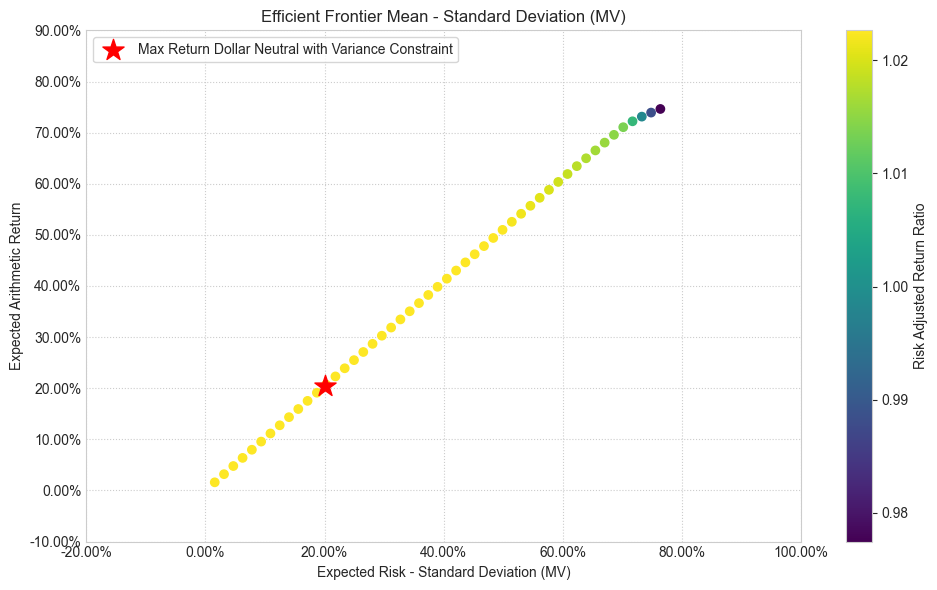

In [18]:
# Plotting the efficient frontier

label = "Max Return Dollar Neutral with Variance Constraint" # Title of point
mu = port.mu # Expected returns
cov = port.cov # Covariance matrix
returns = port.returns # Returns of the assets

ax = rp.plot_frontier(w_frontier=frontier, mu=mu, cov=cov, returns=returns, rm=rm,
                      rf=rf, alpha=0.05, cmap='viridis', w=w, label=label,
                      marker='*', s=16, c='r', height=6, width=10, ax=None)

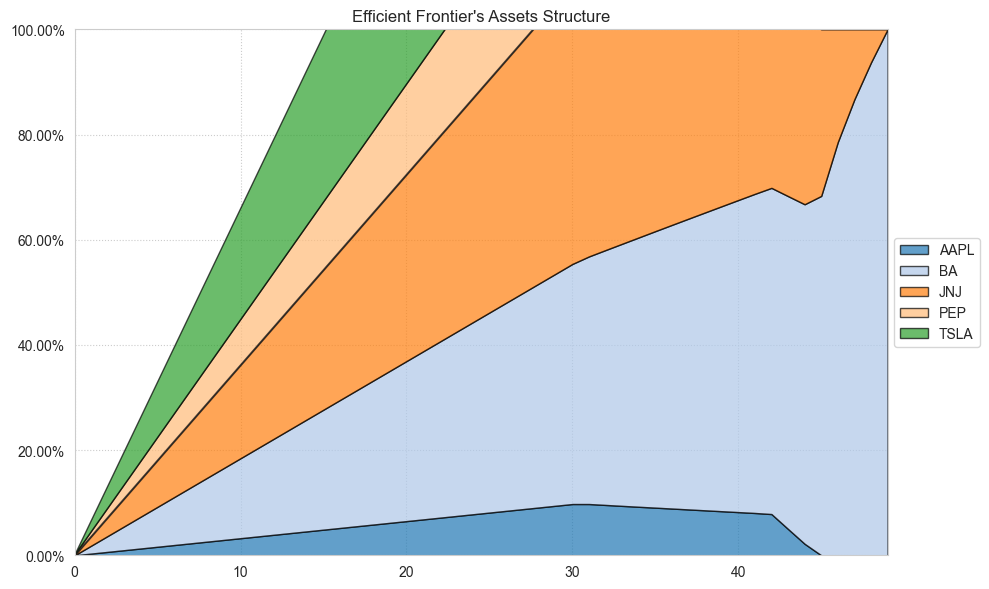

In [8]:
# Plotting efficient frontier composition in absolute values

ax = rp.plot_frontier_area(w_frontier=np.abs(frontier), cmap="tab20", height=6, width=10, ax=None)

## 4. Dollar Neutral Portfolio with a Constraint on CVaR

### 4.1 Calculating Dollar Neutral Portfolio

In [21]:
rm = 'CVaR' # Risk measure
port.upperCVaR = 0.20/252**0.5 # Creating an upper bound for daily CVaR

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

print("Sum weights : ", np.round(np.sum(w.to_numpy()),4))
display(w.T)

Sum weights :  -0.0


,AAPL,BA,JNJ,PEP,TSLA
weights,2.0909%,-7.7389%,-12.5308%,4.4924%,13.6864%


### 4.2 Plotting portfolio composition

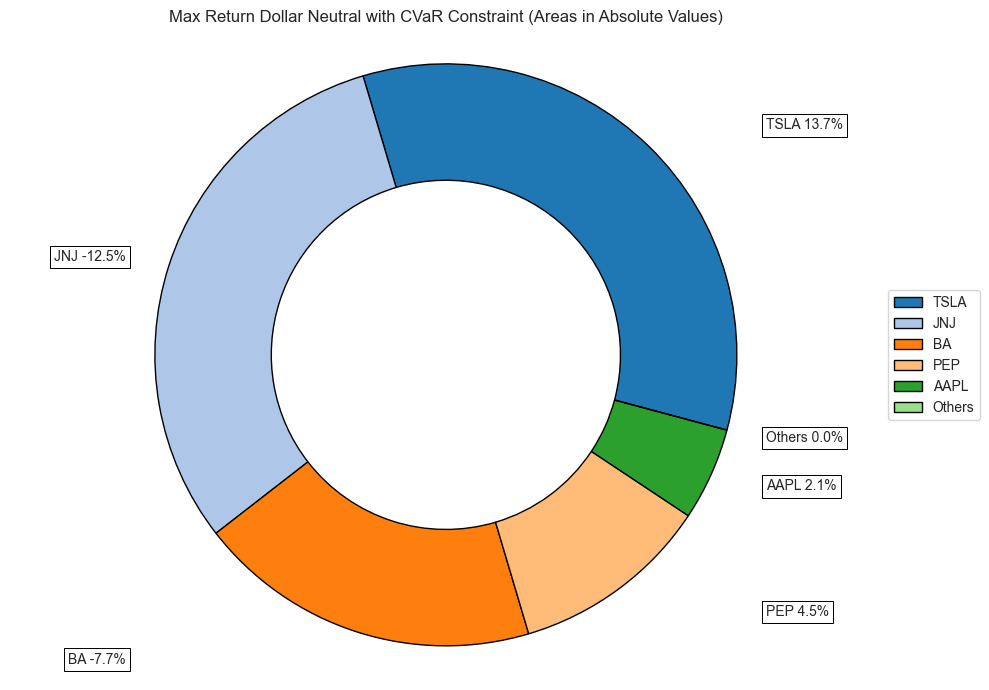

In [22]:
# Plotting the composition of the portfolio

title = "Max Return Dollar Neutral with CVaR Constraint"
ax = rp.plot_pie(w=w,
                 title=title,
                 others=0.05,
                 nrow=25,
                 cmap = "tab20",
                 height=7,
                 width=10,
                 ax=None)

UnboundLocalError: local variable 'b' referenced before assignment

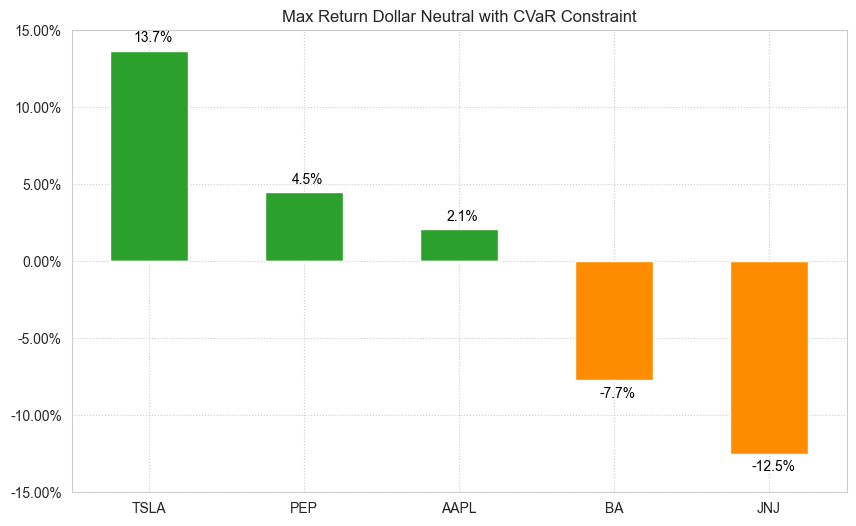

In [23]:
# Plotting the composition of the portfolio using bar chart

ax = rp.plot_bar(w,
                 title="Max Return Dollar Neutral with CVaR Constraint",
                 kind="v",
                 others=0.05,
                 nrow=25,
                 height=6,
                 width=10)

### 4.3 Calculate efficient frontier

In [24]:
points = 50 # Number of points of the frontier
port.upperCVaR = None # Deleting the upper bound for daily CVaR

frontier = port.efficient_frontier(model=model, rm=rm, points=points, rf=rf, hist=hist)

display(frontier.T.head())

,AAPL,BA,JNJ,PEP,TSLA
0,0.0000%,-0.0000%,-0.0000%,0.0000%,0.0000%
1,0.3574%,-1.3229%,-2.1420%,0.7679%,2.3395%
2,0.7148%,-2.6457%,-4.2840%,1.5358%,4.6790%
3,1.0722%,-3.9686%,-6.4259%,2.3038%,7.0185%
4,1.4296%,-5.2914%,-8.5679%,3.0717%,9.3580%


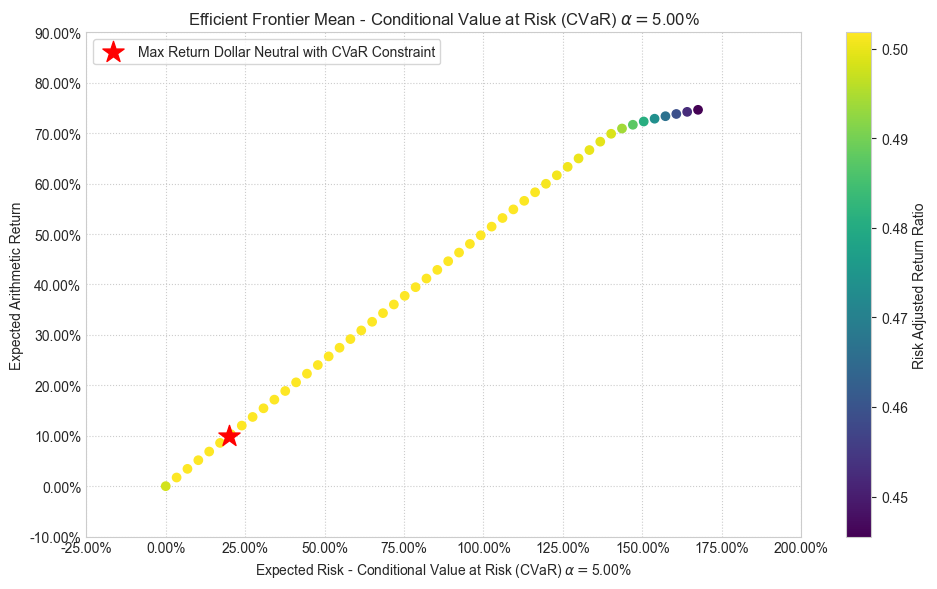

In [25]:
label = "Max Return Dollar Neutral with CVaR Constraint" # Title of point

ax = rp.plot_frontier(w_frontier=frontier, mu=mu, cov=cov, returns=returns, rm=rm,
                      rf=rf, alpha=0.05, cmap='viridis', w=w, label=label,
                      marker='*', s=16, c='r', height=6, width=10, ax=None)

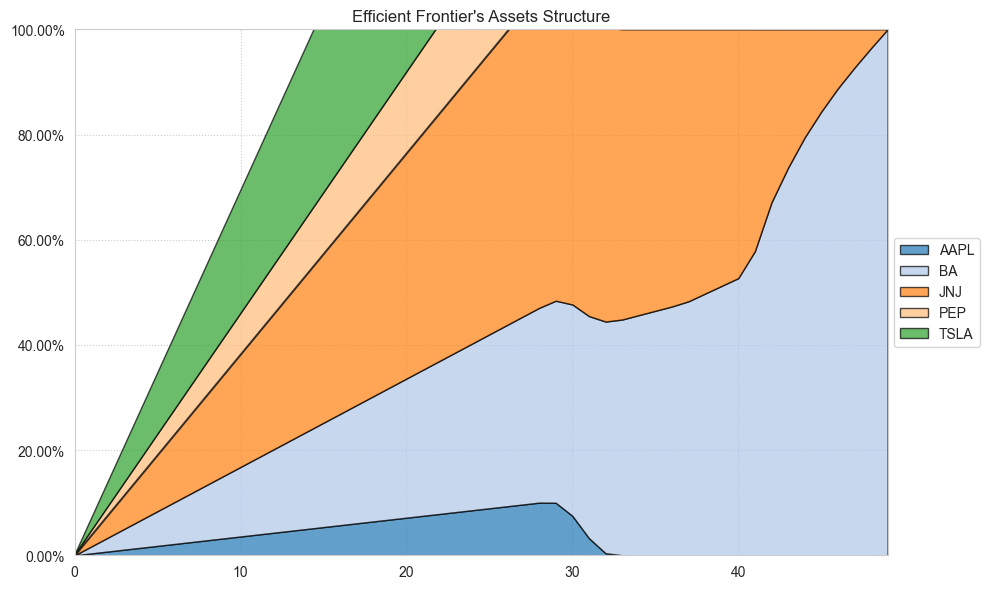

In [14]:
# Plotting efficient frontier composition in absolute values

ax = rp.plot_frontier_area(w_frontier=np.abs(frontier), cmap="tab20", height=6, width=10, ax=None)